<a href="https://colab.research.google.com/github/BriukhanovMA/GostPdfLatex/blob/main/%D0%AD%D0%A2%D0%9C_%D0%BB%D0%B0%D0%B1%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [233]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import display, Math, Latex
# необходимые значения
k=1.38e-23    #  Больцмана постоянная
q=1.6e-19     #  заряд электрона

#  Предэкпоненциальный множитель в формуле для энергии активации керамики
List_procent = [0, 1, 2, 3, 5, 7, 10, 15]
#  Энергия активации керамики
List_E_keramiki = [2.12, 1.54, 1.51, 1.44, 1.41, 1.38, 1.35, 1.29] 

#  Предэкпоненциальный множитель в формуле для энергии активации керамики
List_So = [1.8e08, 2.8e04, 2.1e04, 7.8e03, 8.0e03, 6.0e03, 5.1e03, 2.8e03]


Ro=1.0e+7              #  удельное бъемное сопротивление оксида алюминия Ro
S =1 * 1.0e-12          # Значение площади диэлектрика S в мкронах в квадрате
h=0.05 * 1.0e-06       # Значение толщины измерено в микронах

# Уд.объем. сопротивление, Ом*м эксперементально измеренное

List_R_izm = np.array([33740000., 29740000., 12740000., 11740000., 4740000., 2940000., 2540000., 1140000., 840000.])

# Создаем словарь с данными
data = {'t, град С': np.array([400, 410, 420, 430, 440, 450, 460, 470, 480]),
        'Т, град К': np.array([673, 683, 693, 703, 713, 723, 733, 743, 753]),
        '1000/Т, град К': np.array([1.49, 1.46, 1.44, 1.42, 1.4 , 1.38, 1.36, 1.35, 1.33]),
}
      
# определяем сопротивления образца по геометрических размерам
RR = Ro * S * h

def Sigmadata(data, Sig_0, E_, flag = False):
  # необходимые значения
  k=1.38e-23    #  Больцмана постоянная
  q=1.6e-19     #  заряд электрона
  # Для внесения погрешностив измерения
  Pogr = (0.95+0.005*np.random.randint(0,20,9))
  data['проводимость sigma 1/Ом*м'] = Sig_0 * np.exp(-(E_*q/(k*(data['Т, град К']))))
  data['уд.объем. сопротивление, Ом*м'] = 1/data['проводимость sigma 1/Ом*м']
  data['Натур. логарифм проводимости'] = np.log(data['проводимость sigma 1/Ом*м'])
  if flag:
    data['проводимость sigma 1/Ом*м'] = np.exp(data['Натур. логарифм проводимости'] * Pogr)
    data['уд.объем. сопротивление, Ом*м'] = 1/data['проводимость sigma 1/Ом*м']
    data['Натур. логарифм проводимости'] = np.log(data['проводимость sigma 1/Ом*м'])

  # Выводим формулу в разметке LaTeX
  # display(Math(r"\sigma_{dc}(T) = \sigma_{0} \cdot \exp{-\frac{E_{a}q}{kT}}"))

  # display(Latex(r'''\text{где:   $E_{a}$ — энергия  активации, \\
  # $\sigma_{0}$ — предэкспоненциальный  множитель, \\
  # k — постоянная  Больцмана, \\
  # T — температура, q - заряд электрона}
  # '''))
  tabl = {'постоянная Больцмана': [k],
          'заряд электрона': [q],
          'энергия  активации': [E_],
          'предэкспоненциальный  множитель': [Sig_0]
          }
  # tabl_Makdown(tabl)
  return data


#  функция получающая данные и строющая график $ F (\ln{\sigma}) = \frac{1000}{T} $
# Также добавляет апроксимакцию
def Grafic_aproksi(data):
    # Вычисляем натуральный логарифм проводимости
  ln_sigma = data['Натур. логарифм проводимости']

  # Вычисляем 1000/Т, град К
  inv_T = data['1000/Т, град К']

  # Строим график
  plt.plot(inv_T, ln_sigma, 'o')

  # Вычисляем линейную аппроксимацию
  fit = np.polyfit(inv_T, ln_sigma, 1)
  fit_fn = np.poly1d(fit)

  # Строим линейную аппроксимацию
  plt.plot(inv_T, fit_fn(inv_T), '--k')
  T_Left=1.32
  T_Right=1.5
  # задаем ширину оси Х
  plt.axis([T_Left,T_Right,-19,-11])


  # Добавляем подписи к осям и заголовок графика
  plt.xlabel('1000/Т, град К')
  plt.ylabel('$\ln{\sigma}$')
  plt.title(r'$ F (\ln{\sigma}) = \frac{1000}{T} $')

  # Отображаем график
  plt.show()

# Функция выводящая данные из словаря в таблицу Markdown
def tabl_Makdown(data):
  # Создаем DataFrame из словаря
  df = pd.DataFrame(data)
  
# Выводим DataFrame в виде таблицы в разметке markdown
  print(f'''

{df.to_markdown(index=False)}
_______________________________________________________________

  ''')

# Графики построенные по теоретическим данным с перебором состава
def Teor_gravif_ales(data):
  #  Предэкпоненциальный множитель в формуле для энергии активации керамики
  List_procent = [0, 1, 2, 3, 5, 7, 10, 15]
  for i in range(0, 8):
    print(f'График с содержание шпинеля {List_procent[i]} %')
    tabl = Sigmadata(data, List_So[i], List_E_keramiki[i])
    Grafic_aproksi(tabl)

# Функция полная
def main(i):
  List_procent = [0, 1, 2, 3, 5, 7, 10, 15]
  #  Энергия активации керамики
  List_E_keramiki = [2.12, 1.54, 1.51, 1.44, 1.41, 1.38, 1.35, 1.29] 
  #  Предэкпоненциальный множитель в формуле для энергии активации керамики
  List_So = [1.7e08, 2.8e04, 2.1e04, 7.8e03, 8.0e03, 6.0e03, 5.1e03, 2.8e03]
  # Создаем словарь с данными
  data = {'t, град С': np.array([400, 410, 420, 430, 440, 450, 460, 470, 480]),
          'Т, град К': np.array([673, 683, 693, 703, 713, 723, 733, 743, 753]),
          '1000/Т, град К': np.array([1.49, 1.46, 1.44, 1.42, 1.4 , 1.38, 1.36, 1.35, 1.33]),
  }
  print(f'Задание с содержание шпинеля {List_procent[i]} %')
  tabl = Sigmadata(data, List_So[i], List_E_keramiki[i], flag = True)
  tabl_Makdown(tabl)
  Grafic_aproksi(tabl)







График с содержание шпинеля 0 %


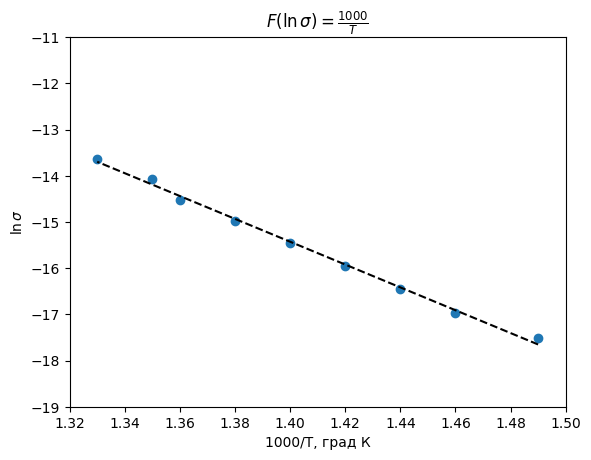

График с содержание шпинеля 1 %


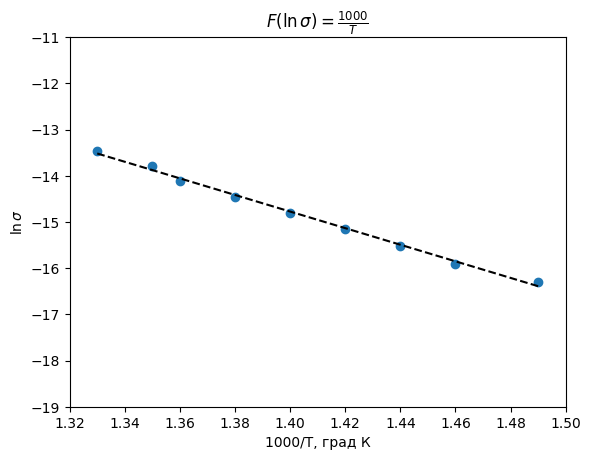

График с содержание шпинеля 2 %


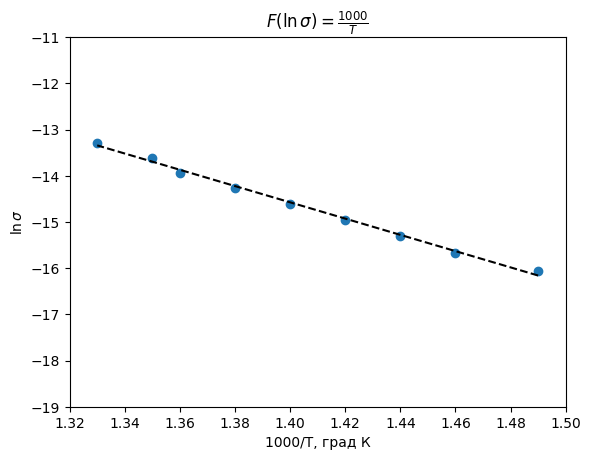

График с содержание шпинеля 3 %


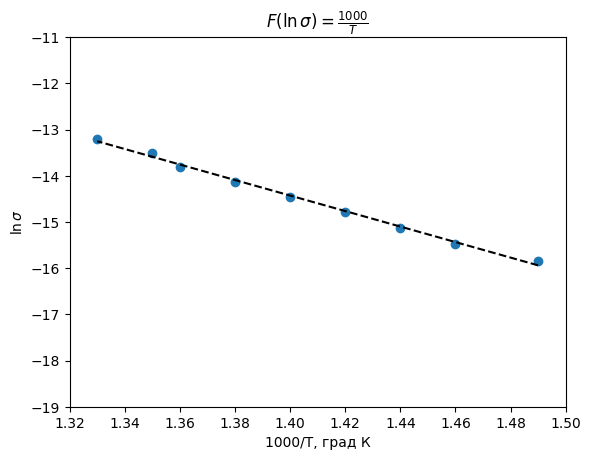

График с содержание шпинеля 5 %


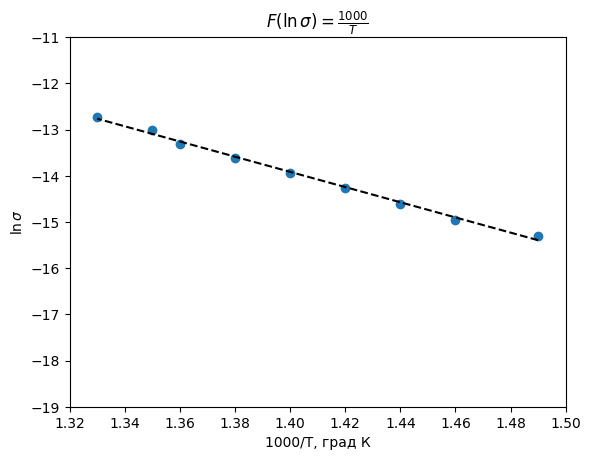

График с содержание шпинеля 7 %


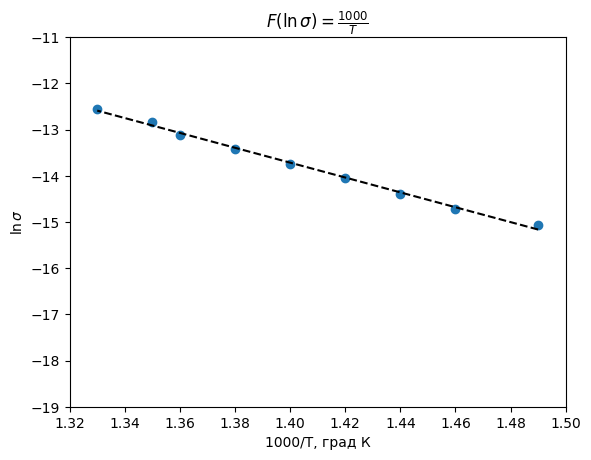

График с содержание шпинеля 10 %


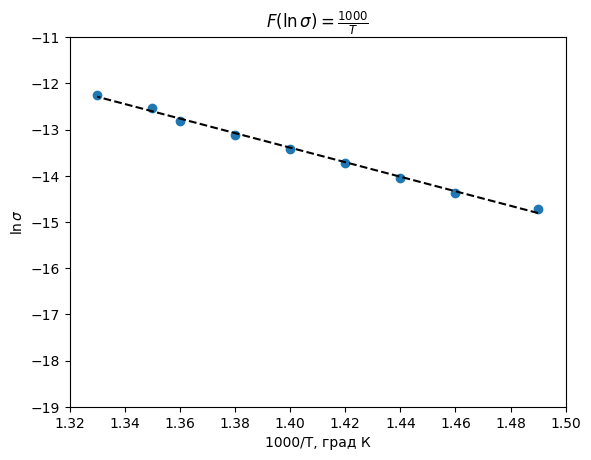

График с содержание шпинеля 15 %


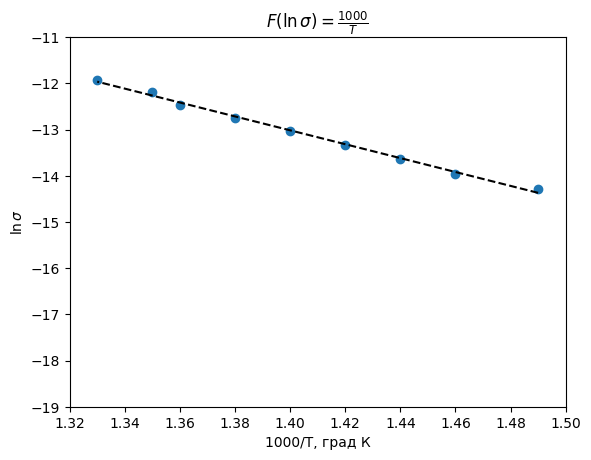

Задание с содержание шпинеля 7 %


|   t, град С |   Т, град К |   1000/Т, град К |   проводимость sigma 1/Ом*м |   уд.объем. сопротивление, Ом*м |   Натур. логарифм проводимости |
|------------:|------------:|-----------------:|----------------------------:|--------------------------------:|-------------------------------:|
|         400 |         673 |             1.49 |                 3.55937e-07 |                     2.80948e+06 |                       -14.8485 |
|         410 |         683 |             1.46 |                 4.65906e-07 |                     2.14635e+06 |                       -14.5793 |
|         420 |         693 |             1.44 |                 1.07733e-06 |                928221           |                       -13.741  |
|         430 |         703 |             1.42 |                 9.01247e-07 |                     1.10957e+06 |                       -13.9195 |
|         440 |         713 |             1.4  |                 1.32412e-06 |           

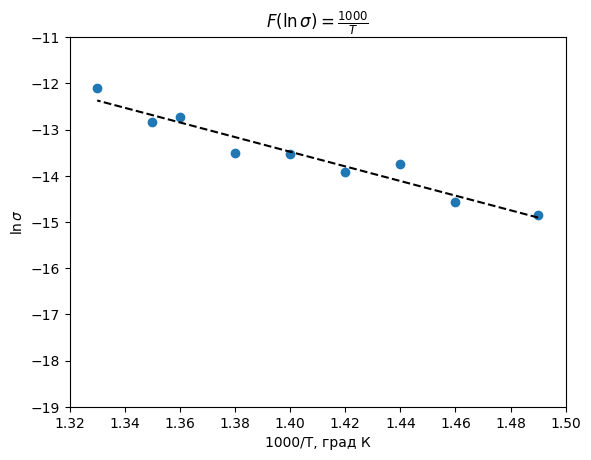

In [240]:
Teor_gravif_ales(data)
main(5)